## EDA for final dataset

1. User has between 500-1000 reviews
2. Recipe dataset and user interaction dataset are combined (based on id)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IntroML/data/final_dataset.csv')
df.head(3)

,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recipe_id            97648 non-null  int64  
 1   name                 97648 non-null  object 
 2   n_steps              97648 non-null  int64  
 3   n_ingredients        97648 non-null  int64  
 4   minutes              97648 non-null  int64  
 5   calories             97648 non-null  float64
 6   total fat (PDV)      97648 non-null  float64
 7   sugar (PDV)          97648 non-null  float64
 8   sodium (PDV)         97648 non-null  float64
 9   protein (PDV)        97648 non-null  float64
 10  saturated fat (PDV)  97648 non-null  float64
 11  carbohydrates (PDV)  97648 non-null  float64
 12  user_id              97648 non-null  int64  
 13  date                 97648 non-null  object 
 14  review               97648 non-null  object 
 15  rating               97648 non-null 

## EDA to do

1. Distribution of nutritional components
2. Distribution of rating score
3. Number of ratings each recipe has vs avg rating of recipe
4. Number of reviews user has done vs avg rating by user
5. Wordcloud

### 1. Distribution of nutritional components

In [ ]:
df.columns

Index(['recipe_id', 'name', 'n_steps', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating'],
      dtype='object')

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']].describe()

,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,97648.000000,97648.000000,97648.000000,97648.000000,97648.000000,97648.000000,97648.000000
mean,428.085783,32.457531,68.023595,29.857355,33.187223,40.334620,13.640863
std,656.819031,61.773359,196.873550,113.902886,55.476257,79.430278,27.763143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.500000,8.000000,8.000000,5.000000,6.000000,6.000000,3.000000
50%,291.200000,19.000000,21.000000,14.000000,17.000000,21.000000,8.000000
75%,481.700000,37.000000,58.000000,32.000000,50.000000,48.000000,15.000000
max,40159.200000,4331.000000,8320.000000,9692.000000,6552.000000,4969.000000,2275.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe035ee3d50>,
      dtype=object)

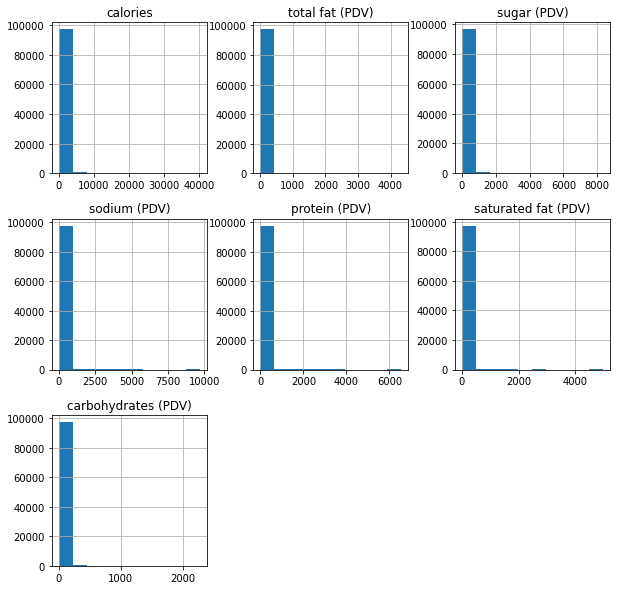

In [ ]:
df[['calories','total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)','saturated fat (PDV)', 'carbohydrates (PDV)']].hist(figsize=(10,10))

Since there are some outliers, we will proceed to drop them

**Calories** threshold: If we assume the nutritional information is per serving, a reasonable recipe should max ~1000 calories. Thus, we will drop recipes that have more than 1000 calories.

**Other** values: Since they are measured using PDV (percent daily value), we will not take recipes that are more than 200% of the recommended daily intake

In [ ]:
# removing the outliers

df.drop(df[
           (df['calories'] > 1000) | 
           (df['sugar (PDV)'] > 200) | 
           (df['protein (PDV)'] > 200) | 
           (df['total fat (PDV)'] > 200) | 
           (df['sodium (PDV)'] > 200) | 
           (df['saturated fat (PDV)'] > 200) | 
           (df['carbohydrates (PDV)'] > 200) |
           (df['calories'] < 1) |
           (df['sugar (PDV)'] < 1) | 
           (df['protein (PDV)'] < 1) | 
           (df['total fat (PDV)'] < 1) | 
           (df['sodium (PDV)'] < 1) | 
           (df['saturated fat (PDV)'] < 1) | 
           (df['carbohydrates (PDV)'] < 1)           
           ].index, 
        inplace=True)

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']].describe()

,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000
mean,345.223659,26.246403,38.108567,23.531812,32.171540,32.860156,9.992777
std,198.243930,21.491925,41.319633,23.557576,30.395643,31.157402,7.609291
min,24.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,194.575000,10.000000,10.000000,7.000000,8.000000,10.000000,4.000000
50%,305.100000,20.000000,22.000000,16.000000,21.000000,24.000000,8.000000
75%,456.600000,36.000000,50.000000,32.000000,51.000000,46.000000,14.000000
max,999.900000,168.000000,200.000000,199.000000,200.000000,200.000000,72.000000


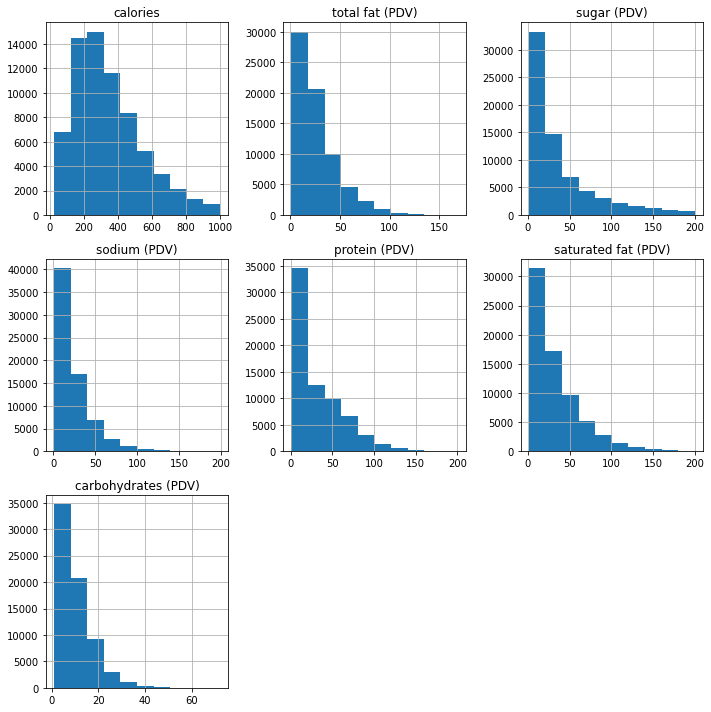

In [ ]:
df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)','saturated fat (PDV)', 'carbohydrates (PDV)']].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
lst = ['calories',
    'log calories',
    'sqrt calories',
    'total fat (PDV)', 
    'log fat',
    'sqrt fat',
    'sugar (PDV)',
    'log sugar',
    'sqrt sugar', 
    'sodium (PDV)', 
    'log sodium',
    'sqrt sodium',
    'protein (PDV)',
    'log protein',
    'sqrt protein',
    'saturated fat (PDV)',
    'log sat fat',
    'sqrt sat fat', 
    'carbohydrates (PDV)',
    'log carbs',
    'sqrt carbs'
    ]

for i in range(0, len(lst), 3):
  # print(lst[i], lst[i+1], lst[i+2], '\n')
  orig = lst[i]
  log = lst[i+1]
  sqrt = lst[i+2]
  df[log] = np.log(df[orig])
  df[sqrt] = np.sqrt(df[orig])

In [ ]:
df.columns

Index(['recipe_id', 'name', 'n_steps', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating', 'log calories', 'sqrt calories', 'log fat',
       'sqrt fat', 'log sugar', 'sqrt sugar', 'log sodium', 'sqrt sodium',
       'log protein', 'sqrt protein', 'log sat fat', 'sqrt sat fat',
       'log carbs', 'sqrt carbs'],
      dtype='object')

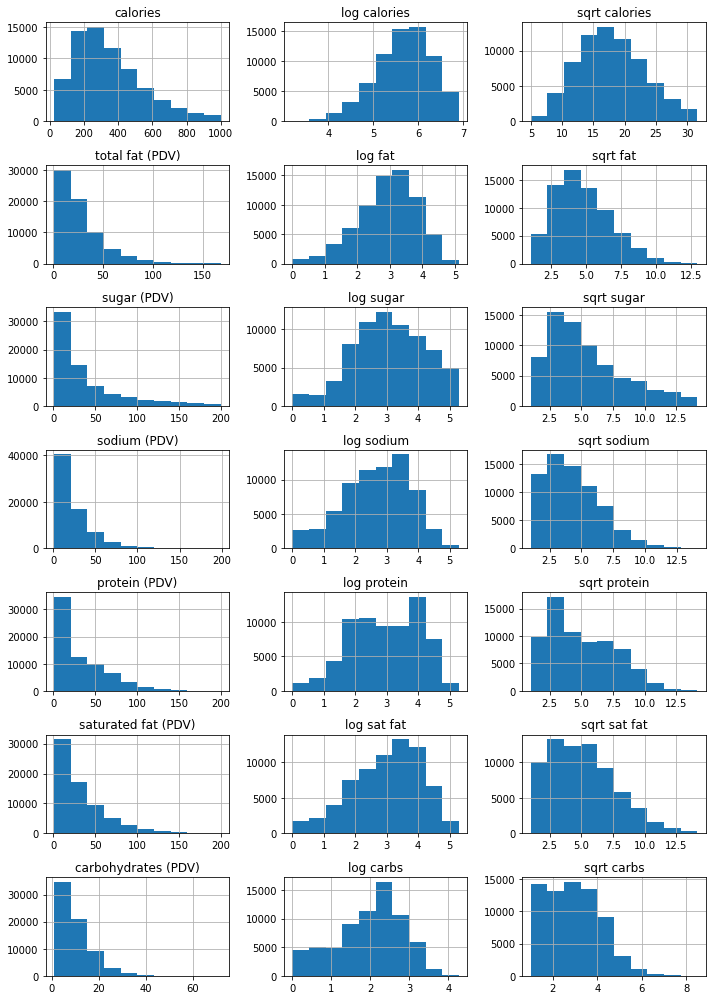

In [ ]:
df[['calories',
    'log calories',
    'sqrt calories',
    'total fat (PDV)', 
    'log fat',
    'sqrt fat',
    'sugar (PDV)',
    'log sugar',
    'sqrt sugar', 
    'sodium (PDV)', 
    'log sodium',
    'sqrt sodium',
    'protein (PDV)',
    'log protein',
    'sqrt protein',
    'saturated fat (PDV)',
    'log sat fat',
    'sqrt sat fat', 
    'carbohydrates (PDV)',
    'log carbs',
    'sqrt carbs'
    ]
   ].hist(figsize=(10,14), layout=(7,3))
plt.tight_layout()
plt.show()

### 2. Distribution of ratings

In [ ]:
df.columns

Index(['recipe_id', 'name', 'n_steps', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating', 'log calories', 'sqrt calories', 'log fat',
       'sqrt fat', 'log sugar', 'sqrt sugar', 'log sodium', 'sqrt sodium',
       'log protein', 'sqrt protein', 'log sat fat', 'sqrt sat fat',
       'log carbs', 'sqrt carbs'],
      dtype='object')

In [ ]:
df.rating.value_counts()

5    50275
4    14872
3     2528
0     1077
2      392
1       76
Name: rating, dtype: int64

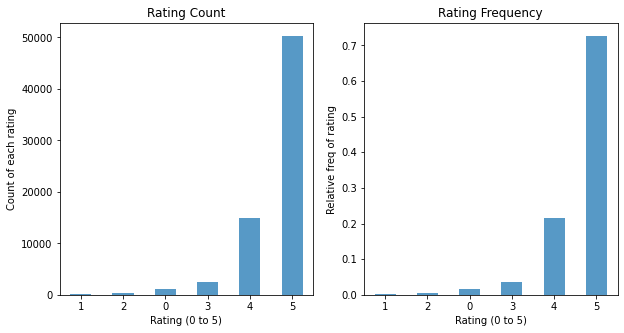

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['rating'].value_counts(ascending=True).plot(kind="bar", 
                                               title="Rating Count", 
                                               alpha=0.75,
                                               rot=0, 
                                               xlabel="Rating (0 to 5)", 
                                               ylabel="Count of each rating",
                                               ax=axes[0],
                                               figsize=(10,5)
                                               )

df['rating'].value_counts(ascending=True,normalize=True).plot(kind="bar", 
                                                              alpha=0.75, 
                                                              title="Rating Frequency", 
                                                              rot=0, 
                                                              xlabel="Rating (0 to 5)", 
                                                              ylabel="Relative freq of rating",
                                                              ax=axes[1],
                                                              figsize=(10,5)
                                                              )

### 3. Number of ratings each recipe has vs avg rating of recipe

In [ ]:
df_recipe = df.groupby('recipe_id')

In [ ]:
df_recipe_rating = pd.concat([df_recipe['rating'].mean(), df_recipe['rating'].sum()], axis=1)
df_recipe_rating.columns = ['avg_rating','total_rating']
print(df_recipe_rating)

           avg_rating  total_rating
recipe_id                          
58                5.0             5
85                5.0             5
91                5.0             5
114               5.0             5
119               4.0             4
...               ...           ...
536119            4.0             4
536401            5.0             5
536411            5.0             5
537071            4.0             4
537073            5.0             5

[46291 rows x 2 columns]


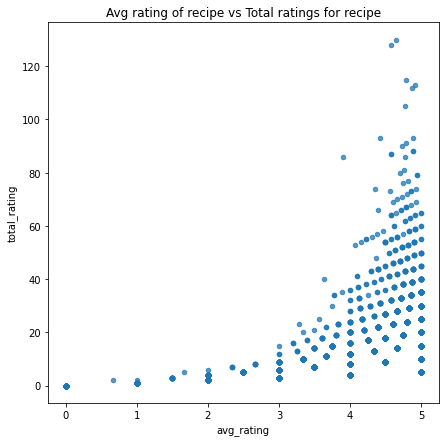

In [ ]:
# y = total reviews of each recipe
# x = avg review for each recipe
#each plot in the graph is an individual recipe

df_recipe_rating.plot(kind='scatter',
                      title='Avg rating of recipe vs Total ratings for recipe',
                      alpha=0.75,
                      x='avg_rating',
                      y='total_rating',
                      figsize=(7,7)
                      )

### 4. Number of reviews user has done vs avg rating by user

In [ ]:
df_user = df.groupby('user_id')

In [ ]:
df_user_rating = pd.concat([df_user['rating'].mean(), df_user['rating'].sum()], axis=1)
df_user_rating.columns = ['avg_rating','total_rating']
print(df_user_rating)

            avg_rating  total_rating
user_id                             
1535          4.470356          2262
4439          4.645514          2123
6258          4.691262          2416
8629          4.297203          2458
11297         4.653333          1745
...                ...           ...
953275        4.554726          1831
962690        4.394886          1547
1058097       4.764563          1963
1680722       4.984283          2537
2000431901    4.040872          1483

[137 rows x 2 columns]


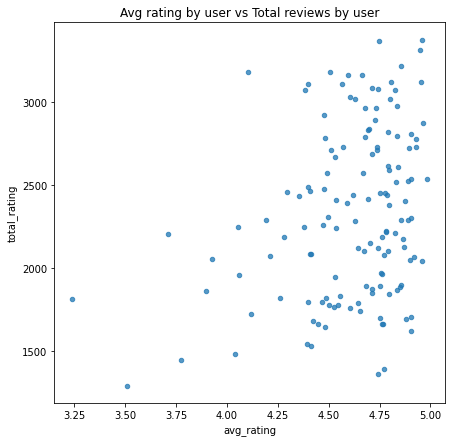

In [ ]:
# y = total reviews of each user
# x = avg review of each user
#each plot in the graph is an individual user

df_user_rating.plot(kind='scatter',
                    title='Avg rating by user vs Total reviews by user',
                    alpha=0.75,
                    x='avg_rating',
                    y='total_rating',
                    figsize=(7,7)
                    )

### 5. Wordcloud

Clean up text columns first, then do wordcloud for:

1. Reviews
   
   a. For all reviews

   b. Breakdown rating 0 to 5

In [ ]:
# grab only the ratings and their review from the original df
df_review = df[['rating','review']]

#set the ratings to be the index, and drop the 'rating' column name
df_review = df_review.set_index('rating')
df_review.index.name = None
df_review

,review
2,I tried this recipe because it was the first s...
4,What a great quick & easy meal especially for ...
4,Easy and tasty. Really made my steak special....
4,So easy and tasty. To make the clean-up even...
4,The man of the house really loved the sauce wi...
...,...
5,I had to make small adjustments according to w...
4,I had homemade pumpkin pur&eacute;e instead of...
4,I doubled the garlic and felt that it could us...
4,I made this as a side because DH is a meat and...


#### Cleaning up text

##### Removing stopwords & punc, making lowercase

In [2]:
import re 
import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [34]:
stop = stopwords.words('english')
def clean_text(text):
    # Lowercase, Remove Non-alphanumeric characters, Punctuations, Numbers & Stopwords
    text = text.lower()
    text = re.sub('[^A-Za-z\s]+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) 

    text = ' '.join([word for word in text.split() if word not in (stop)])

    return text

In [ ]:
# apply cleaning function onto review column
df_review = pd.DataFrame(df_review['review'].apply(clean_text))
df_review.head()

,review
2,tried recipe first small quantity baked bean r...
4,great quick easy meal especially mushroom lovers
4,easy tasty really made steak special thanks do...
4,easy tasty make cleanup even easier lined baki...
4,man house really loved sauce one great


In [ ]:
#pickle corpus
df_review.to_pickle('/content/drive/MyDrive/IntroML/data/review_corpus.pkl')

##### Getting most common words by rating number

In [3]:
#If using pickle
df_review = pd.read_pickle('/content/drive/MyDrive/IntroML/data/review_corpus.pkl')
df_review

,review
2,tried recipe first small quantity baked bean r...
4,great quick easy meal especially mushroom lovers
4,easy tasty really made steak special thanks do...
4,easy tasty make cleanup even easier lined baki...
4,man house really loved sauce one great
...,...
5,make small adjustments according hand used rol...
4,homemade pumpkin pureacutee instead canned muc...
4,doubled garlic felt could use big garlic fans ...
4,made side dh meat potatoes kind guy got packag...


In [11]:
#since my computer and colab cannot handle cv to create a counter, we will just use a rudimentary counter
top_words = {}

for i in range(6): #for rating 0 to 5
  wc = {}
  for line in df_review['review'][i].str.split(): 
      for word in line:
        if word not in wc:
          wc[word]=1
        else:
          wc[word]+=1
  top_words[i] = wc

In [ ]:
top_dict = []

#run a loop through the top_words to get the most common words
for rating, wordcount in top_words.items():
  word_counter = collections.Counter(wordcount)
  print(rating, "----------------------")
  for word, count in word_counter.most_common(10):
    #prints out the top 10 words in each rating from 0-5
    print(word, ": ", count)
    #add each word to top_dict
    top_dict.append(word)

print(top_dict)

In [26]:
#aggregrate the top_dict list and identify most common words along with how many categories they occur in
#count of words = number of categories they occur in (max you can appear is 6, meaning you appear in rating 0-5)

collections.Counter(top_dict).most_common()

[('recipe', 6),
 ('made', 6),
 ('make', 6),
 ('used', 5),
 ('didnt', 4),
 ('would', 4),
 ('like', 4),
 ('good', 4),
 ('really', 4),
 ('thanks', 3),
 ('sorry', 2),
 ('one', 2),
 ('time', 2),
 ('easy', 2),
 ('try', 1),
 ('work', 1),
 ('im', 1),
 ('taste', 1),
 ('great', 1),
 ('delicious', 1)]

##### adding these words to stop_words

In [41]:
#if more than half of the ratings (i.e. more than 3) have this word as a top word, add it to stop_words 
add_stop_words = [word for word, count in collections.Counter(top_dict).most_common() if count > 2]
add_stop_words


['recipe',
 'made',
 'make',
 'used',
 'didnt',
 'would',
 'like',
 'good',
 'really',
 'thanks']

In [51]:
#add the stopwords into the function clean_text
stop.extend(add_stop_words)

In [52]:
#re-run clean_text to remove the new words
df_review = pd.DataFrame(df_review['review'].apply(clean_text))
df_review.head()

,review
2,tried first small quantity baked bean ive foun...
4,great quick easy meal especially mushroom lovers
4,easy tasty steak special doreen
4,easy tasty cleanup even easier lined baking pa...
4,man house loved sauce one great


#### a. Wordcloud of all reviews

In [53]:
#initialise wordcloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Text(0.5, 1.0, 'Wordcloud of all reviews')

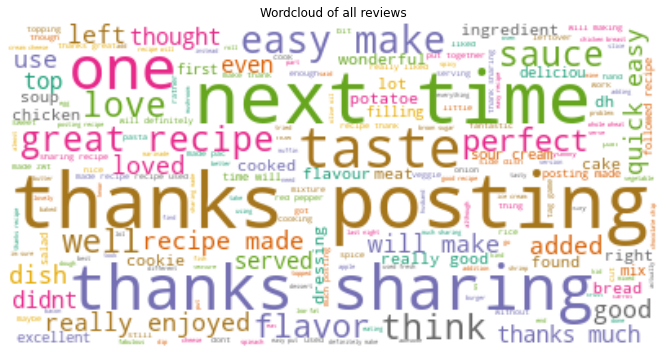

In [ ]:
#before removing additional stopwords
all_review = " ".join(cell for cell in df_review.review)  
wc.generate(all_review) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of all reviews')

Text(0.5, 1.0, 'Wordcloud of all reviews')

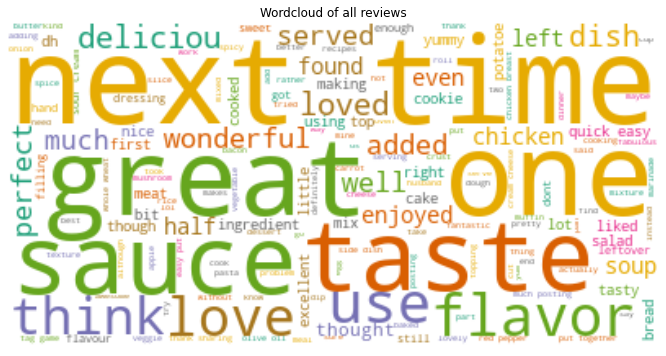

In [54]:
#AFTER removing additional stopwords
all_review = " ".join(cell for cell in df_review.review)  
wc.generate(all_review) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of all reviews')

#### b. Wordcloud of reviews, separated by their ratings

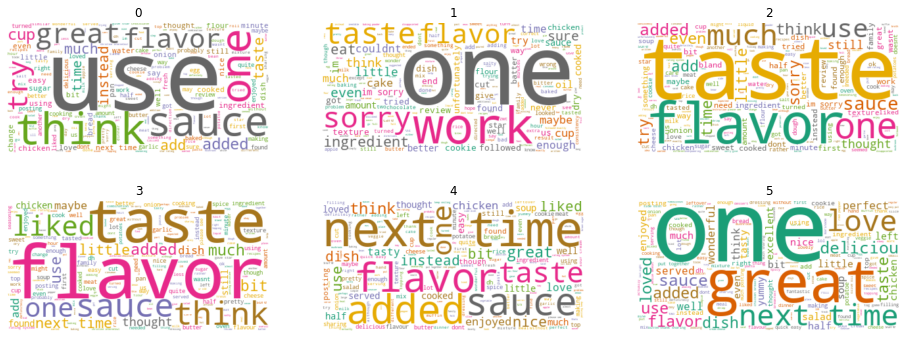

In [55]:
#AFTER removing additional stopwords
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each category
for i in range(6): #i = 0, 1, 2, 3, 4, 5
    all_review = " ".join(cell for cell in df_review.review[i])  
    wc.generate(all_review) 
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(i)
    
plt.show()


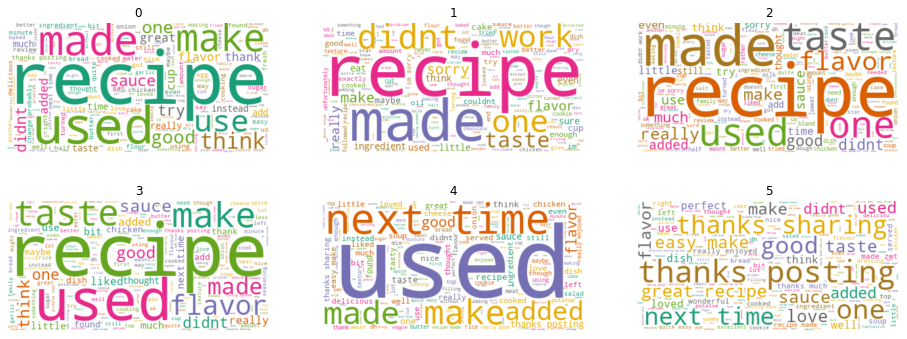

In [40]:
#BEFORE removing additional stopwords
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each category
for i in range(6): #i = 0, 1, 2, 3, 4, 5
    all_review = " ".join(cell for cell in df_review.review[i])  
    wc.generate(all_review) 
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(i)
    
plt.show()


### (not used) n_step, n_ingredient, minutes distribution

x = n_step/n_ingredient/minutes
y = number of recipes

In [ ]:
df[['n_steps','n_ingredients','minutes']].describe()

,n_steps,n_ingredients,minutes
count,97648.000000,97648.000000,9.764800e+04
mean,8.971899,8.622399,4.409264e+04
std,5.359988,3.612197,9.718763e+06
min,0.000000,1.000000,0.000000e+00
25%,5.000000,6.000000,2.000000e+01
50%,8.000000,8.000000,3.500000e+01
75%,11.000000,11.000000,6.000000e+01
max,145.000000,43.000000,2.147484e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0659cb6d0>,
      dtype=object)

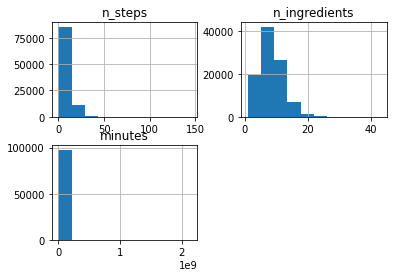

In [ ]:
df[['n_steps','n_ingredients','minutes']].hist()

In [ ]:
df['n_steps'].sort_values(ascending=False)

20868    145
92462    145
86784     82
42557     82
94962     82
        ... 
41515      1
45432      1
66929      1
74079      1
75683      0
Name: n_steps, Length: 97648, dtype: int64

#### Identifying outliers

n_steps: Having a recipe that has 145 steps is quite odd

In [ ]:
df[(df['n_steps'] == 145) | (df['n_steps'] == 82) ]
#recipe in question is here: https://www.food.com/recipe/easy-yeast-bread-with-variations-158120, https://www.food.com/recipe/zuries-overnight-no-knead-bread-196201

,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating
20868,158120,easy yeast bread with variations,145,8,210,1784.5,62.0,104.0,151.0,103.0,42.0,99.0,18391,2006-04-01,This is very good! I made the white bread vers...,5
42557,196201,zurie s overnight no knead bread,82,5,70,1379.6,5.0,12.0,194.0,79.0,3.0,96.0,269521,2008-01-08,I've made this several times and it's wonderfu...,5
86784,196201,zurie s overnight no knead bread,82,5,70,1379.6,5.0,12.0,194.0,79.0,3.0,96.0,496803,2011-12-18,"I just love this bread! I've made it twice, n...",5
92462,158120,easy yeast bread with variations,145,8,210,1784.5,62.0,104.0,151.0,103.0,42.0,99.0,86318,2013-03-27,This is an easy recipe. For a change I mainly ...,5
94962,196201,zurie s overnight no knead bread,82,5,70,1379.6,5.0,12.0,194.0,79.0,3.0,96.0,705251,2014-01-30,I can&#039;t believe it - I made a homemade ye...,5
